# Example 3 - Application of LPMs for Data of Two Tracers

* **General goal**:
    * application of an LPM to model the relationship between two tracers
    * understanding the relationship between two tracers
    * creating and understanding tracer-tracer plots
    * **Note**: this example naturally builds on top of the first example; usually you would fit a LPM (e.g., the exponential model) to both tracers as in the first example and then use the calibrated models (or the calibrated parameter values) to compute the tracer-tracer plot presented here
* Starting from three time series data sets:
    * precipitation measurements
    * tracer concentration in precipitation (tracer / location 1)
    * tracer concentration in precipitation (tracer / location 2)

- **Steps**:
    1. data import and data pre-processing
    2. data visualization
    3. model setup
    4. running the model and analyzing the results
    
**Note: if you are unfamiliar with the `ISOSIMpy` package, do not manipulate any code in this notebook!**

### Step 1: Data Import

#### 1.1 Setting the Plotting Environment

&rarr; Setting the plotting environment (`widget` for dynamic plots, `inline` for static plots)

In [1]:
%matplotlib inline

#### 1.2 Importing Packages

&rarr; Importing packages

In [2]:
from ipyfilechooser import FileChooser
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import *
from Pre import *
from Post import *
from Calculate import *

#### 1.3 Selecting Relevant Files

&rarr; Select files with relevant data
1. Precipitation and source concantration file for tracer 1
2. Precipitation and source concentration file for tracer 2

In [3]:
print('Select your time series of precipitation and concentration input file of tracer 1:')
fc_c = FileChooser('')
display(fc_c)

Select your time series of precipitation and concentration input file of tracer 1:


FileChooser(path='C:\Users\Rudolph\Documents\GitHub\ISOSIMpy', filename='', title='', show_hidden=False, selec…

In [4]:
print('Select your time series of precipitation and concentration input file of tracer 2:')
fc_c_2 = FileChooser('')
display(fc_c_2)

Select your time series of precipitation and concentration input file of tracer 2:


FileChooser(path='C:\Users\Rudolph\Documents\GitHub\ISOSIMpy', filename='', title='', show_hidden=False, selec…

#### 1.4 Importing and Pre-Processing Data

&rarr; Import and initially pre-process data (set date / time etc.)

In [5]:
try:
    rain = Pre.convertTimeC(pd.read_csv(fc_c.selected, sep=';', header=None))
    rain_2 = Pre.convertTimeC(pd.read_csv(fc_c_2.selected, sep=';', header=None))
except:
    print('An error occured!')

&rarr; Data pre-processing
1. Check for negative / zero data points and handle them
2. Perform volume-weighting of concentration in precipitation

In [6]:
rain = Pre.checkZero(rain)
rain_2 = Pre.checkZero(rain_2)

In [7]:
rain = Pre.weightVolumes(rain)
rain_2 = Pre.weightVolumes(rain_2)

### Step 2: Data Visualization

#### 2.1 Plotting Source Concentration Data for Both Tracers

&rarr; Plotting data in one single plot

Here you can see your input datas


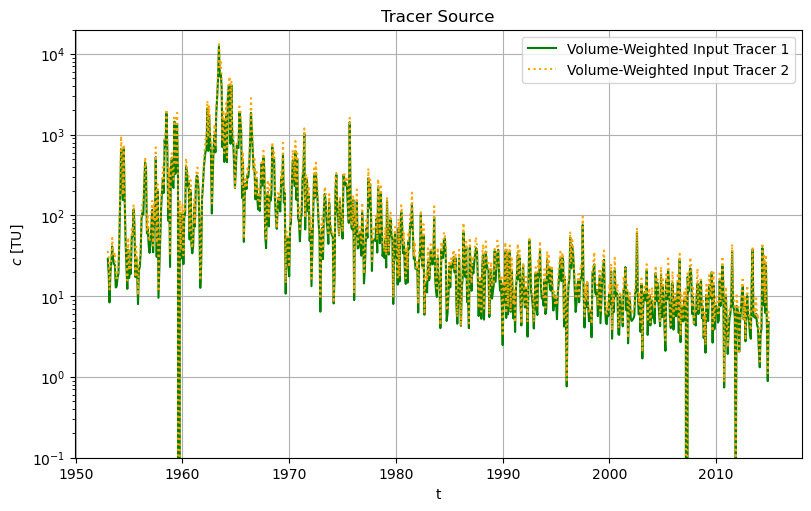

In [8]:
print('Here you can see your input datas')
Par.n = 0
fig = plt.figure(figsize=(8, 5), constrained_layout=True)

ax1 = fig.add_subplot(1, 1, 1)

ax1.plot(rain['Date'], rain['weighted_c'], label='Volume-Weighted Input Tracer 1', color='green')
ax1.plot(rain_2['Date'], rain_2['weighted_c'], label='Volume-Weighted Input Tracer 2', color='orange', ls=":")
ax1.legend()
ax1.set(title='Tracer Source',
        ylabel='$c$ [TU]',
        xlabel='t',
        yscale='log',
        ylim=(0.1, 2e4))
ax1.grid()

### Step 3: Model Setup

#### 3.1 Parameterization

&rarr; Instatiating the parameterization object (`ISOSIMpy.Par()`)

In [9]:
# instantiate / initialize the parameterization object
Par()

# set initial run / model number
Par.n = 0

# set monthly step (i.e., decay constant is divided by 12 and mean TT is multiplied by 12)
Par.step = 0

#### 3.2 Specifying the Vadose Zone Representation

&rarr; Specifying the vadose zone representation (as given by the `Par.SOILM` attribute of the parameterization object)

In [10]:
print('This is not integrated as an dynamic parameter. Set value once and do not change.')
print('Calculation in the vadose zone:')
def setVadoseZone(vadose_zone):
    if vadose_zone == 'No calculation':
        Par.SOILM = 0
    elif vadose_zone == 'Calculation based on monthly factor':
        print('To use this functionality, you must implement it manually')
        # Par.SOILM = 1
    elif vadose_zone == 'Calculation based on hydrologic model':
        # Par.SOILM = 2
        print('To use this functionality, you must implement it manually')
interact(setVadoseZone, vadose_zone = widgets.RadioButtons(options=['No calculation',
                                       'Calculation based on monthly factor',
                                       'Calculation based on hydrologic model'],
                              layout={'width': 'max-content'},
                              description='Calculation in the vadose zone:',
        style={'description_width': 'initial'}))

This is not integrated as an dynamic parameter. Set value once and do not change.
Calculation in the vadose zone:


interactive(children=(RadioButtons(description='Calculation in the vadose zone:', layout=Layout(width='max-con…

<function __main__.setVadoseZone(vadose_zone)>

&rarr; Handling recharge (here, the recharge water tracer concentration is set to the tracer concentration of precipitation water)

In [11]:
if Par.SOILM == 0:
    print('There will be no pre processing regarding to the consideration of evapotranspiration processes.')
    Cin = rain['weighted_c']
    Cin_2 = rain_2['weighted_c']
elif Par.SOILM == 1:
    pass
elif Par.SOILM == 2:
    pass

There will be no pre processing regarding to the consideration of evapotranspiration processes.


&rarr; Giving the user feedback on the state of the model setup

In [12]:
print('All basic settings are now made. The settings that are now still necessary must be selected once at the beginning for the first model run. You then have the possibility to change the parameter combination and compare different variants.')

All basic settings are now made. The settings that are now still necessary must be selected once at the beginning for the first model run. You then have the possibility to change the parameter combination and compare different variants.


#### 3.3 Setting Model Parameters

&rarr; Giving the user feedback on the state of the model setup

In [13]:
print('Model type and parameter values:')
def setParameters(model, mean_tt, half_time, half_time_2, pd, eta):
    if model == 'Piston Flow Model':
        Par.MODNUM = 1
    elif model == 'Exponential Model':
        Par.MODNUM = 2
    elif model == 'Dispersion Model':
        Par.MODNUM = 3
    elif model == 'Linear Model':
        Par.MODNUM = 4
    elif model == 'Exponential - Piston Flow Model':
        Par.MODNUM = 5
    Par.TT = mean_tt
    Par.Thalf_1 = half_time
    Par.Thalf_2 = half_time_2
    Par.PD = pd
    Par.eta = eta
interact(setParameters,
    model = widgets.RadioButtons(options=['Piston Flow Model',
                                       'Exponential Model',
                                       'Dispersion Model',
                                       'Linear Model',
                                       'Exponential - Piston Flow Model'],
                              layout={'width': 'max-content'},
                              description='Modeltype:',
        style={'description_width': 'initial'}),
    mean_tt = widgets.BoundedIntText(value=10, min=1, max=100, step=1,
                                     description='Mean travel time [a]:',
                                    style={'description_width': 'initial'}),
    half_time = widgets.BoundedFloatText(value=10, min=1, max=100, step=0.001,
                                         description='Half Time Tracer 1 [1/a]:',
                                        style={'description_width': 'initial'}),
    half_time_2 = widgets.BoundedFloatText(value=10, min=1, max=100, step=0.001,
                                         description='Half Time Tracer 2 [1/a]:',
                                        style={'description_width': 'initial'}),
    pd = widgets.BoundedFloatText(value=0.1, min=0.01, max=1, step=0.01,
                             description='PD:',
                                 style={'description_width': 'initial'}),
    eta = widgets.BoundedFloatText(value=0.5, min=0.01, max=1, step=0.01,
                             description='eta:',
                                  style={'description_width': 'initial'}))

Model type and parameter values:


interactive(children=(RadioButtons(description='Modeltype:', layout=Layout(width='max-content'), options=('Pis…

<function __main__.setParameters(model, mean_tt, half_time, half_time_2, pd, eta)>

#### 3.4 Setting Additional Parameters

&rarr; specify array of mean travel times to compute results with (`TTs`)

&rarr; specify array of GW-ages that should be labelled in the plot (`show_gw_age`)

&rarr; specify for which time the results should be plotted (`date`)

note, however, that `date` is the number of months from the first precipitation data point!

In [15]:
TTs = np.arange(2., 102., 2.)
show_gw_age = [2., 4., 10., 30., 60., 100.]
date = 740

### Step 4: Running the Model
- **Note**: if you re-run the model multiple times, you can save some time:
    1. specify the parameters etc. above
    2. select this cell here
    3. in the toolbar above, select `Run` &rarr; `Run Selected Cell and All Below`

#### 4.1 Running the Model and Post-Processing

&rarr; Running the model with the parameterization object, input concentration data and precipitation data

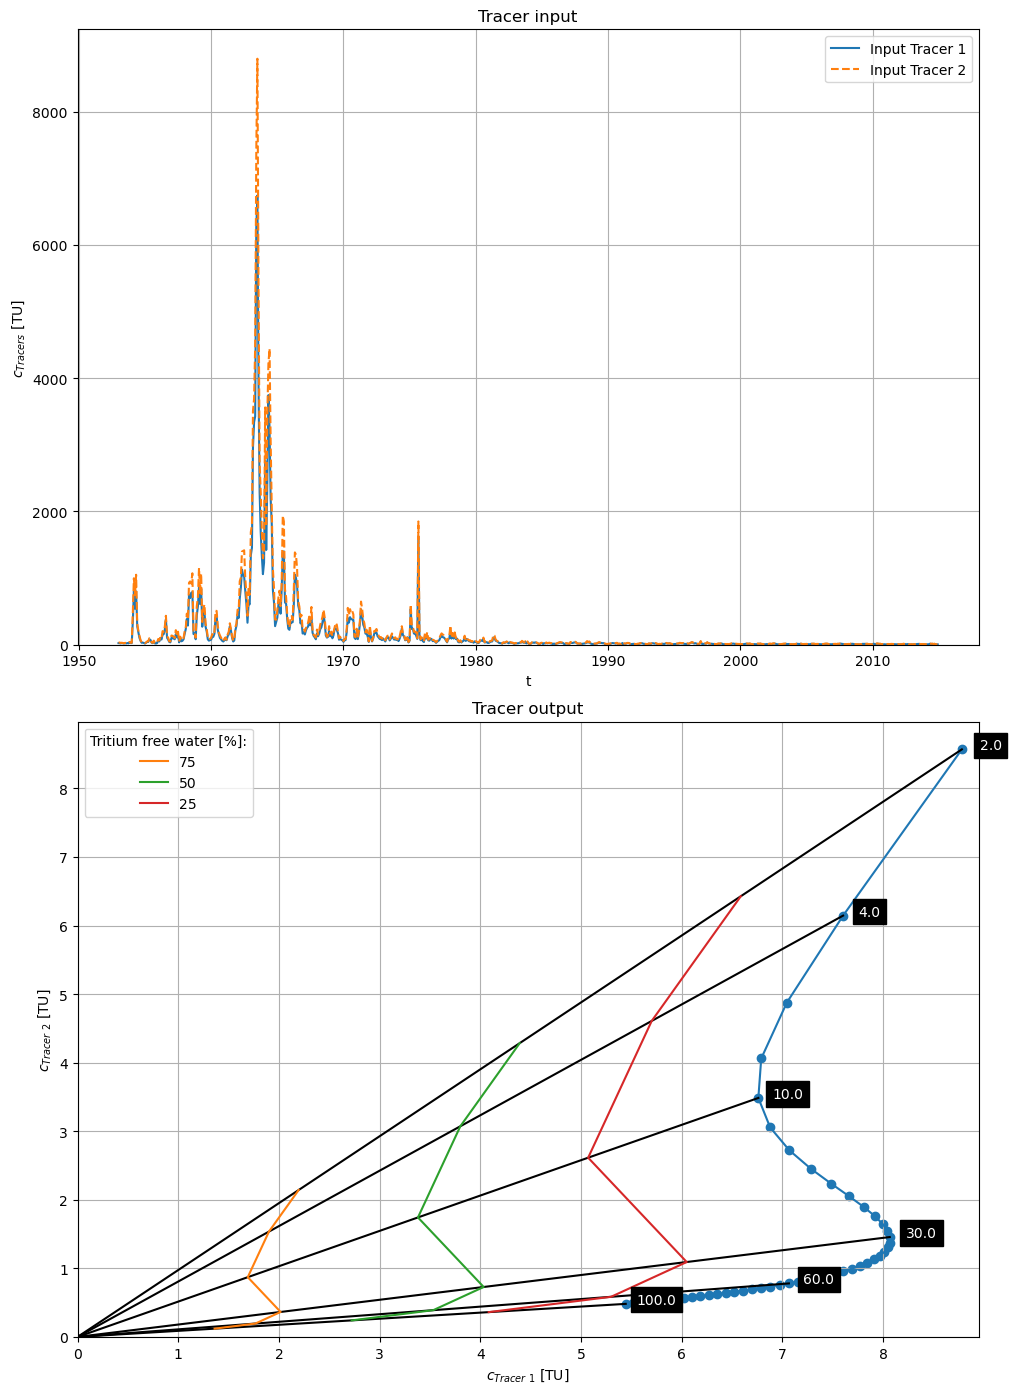

In [16]:
# increase model (run) number
Par.n += 1

# obtain result
result = TracerTracer(Par, Cin, Cin_2, rain, rain_2, TTs)

# perform (automatic) post-processing
Post.tracerTracer(result.result_tt, rain, rain_2, date, show_gw_age, TTs)